In [1]:
import pandas as pd
from pathlib import Path
import string
import numpy as np
import nltk # Natural Language Toolkit ferramenta para processamento de linguagem natural
from nltk.corpus import stopwords #palavras comuns na lingua de analise
from nltk.stem.porter import PorterStemmer # Algorimo para reduzir uma palavra a sua forma base, palavras em INGLES, reduzir ao radical

from sklearn.feature_extraction.text import CountVectorizer # Matriz de frequencia das palavras

### Alguns Exemplos 

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alfredo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Alfredo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alfredo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:

texto = "Este é um exemplo simples de processamento de linguagem natural com NLTK."

tokens = word_tokenize(texto, language='portuguese')
print("Tokens:", tokens)

# Remover stopwords
stop_words = set(stopwords.words('portuguese'))
tokens_filtrados = [palavra for palavra in tokens if palavra.lower() not in stop_words]
print("Sem stopwords:", tokens_filtrados)


Tokens: ['Este', 'é', 'um', 'exemplo', 'simples', 'de', 'processamento', 'de', 'linguagem', 'natural', 'com', 'NLTK', '.']
Sem stopwords: ['exemplo', 'simples', 'processamento', 'linguagem', 'natural', 'NLTK', '.']


In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

# 📝 Texto de exemplo
text = "The students were studying natural language processing and learning how to analyze text data."

# 1️⃣ Tokenizar (dividir em palavras)
tokens = word_tokenize(text)
print("Tokens:", tokens)

# 2️⃣ Remover stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
print("\nSem stopwords:", filtered_tokens)

# 3️⃣ Aplicar stemming
stemmer = PorterStemmer()
stems = [stemmer.stem(word) for word in filtered_tokens]
print("\nCom stemming:", stems)


Tokens: ['The', 'students', 'were', 'studying', 'natural', 'language', 'processing', 'and', 'learning', 'how', 'to', 'analyze', 'text', 'data', '.']

Sem stopwords: ['students', 'studying', 'natural', 'language', 'processing', 'learning', 'analyze', 'text', 'data']

Com stemming: ['student', 'studi', 'natur', 'languag', 'process', 'learn', 'analyz', 'text', 'data']


In [5]:
# Exemplo de textos
corpus = [
    "I love playing football with my friends.",
    "My friends love to play basketball.",
    "Football and basketball are popular sports."
]

# 1️⃣ Pré-processamento com NLTK
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    # tokenizar
    tokens = word_tokenize(text.lower())
    # remover stopwords e pontuação
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    # aplicar stemming
    tokens = [stemmer.stem(t) for t in tokens]
    # juntar novamente
    return " ".join(tokens)

corpus_clean = [preprocess(text) for text in corpus]
print("✅ Textos limpos:")
print(corpus_clean)

✅ Textos limpos:
['love play footbal friend', 'friend love play basketbal', 'footbal basketbal popular sport']


In [6]:
# Criar o vetor de contagem
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus_clean)

# Mostrar o vocabulário aprendido
print("Vocabulário:", vectorizer.get_feature_names_out())

# Mostrar a matriz de contagem
print("\nMatriz (linhas=frases, colunas=palavras):")
print(X.toarray())

Vocabulário: ['basketbal' 'footbal' 'friend' 'love' 'play' 'popular' 'sport']

Matriz (linhas=frases, colunas=palavras):
[[0 1 1 1 1 0 0]
 [1 0 1 1 1 0 0]
 [1 1 0 0 0 1 1]]


### Codigo de detector de spam


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

Importando os dados do Kanglle

In [35]:
import kagglehub
# Download latest version
# Codigo do proprio kanglle
path = kagglehub.dataset_download("venky73/spam-mails-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\Alfredo\.cache\kagglehub\datasets\venky73\spam-mails-dataset\versions\1


In [36]:
path = Path(path)
arquivos = [arq.name for arq in path.rglob('*')]
arquivos

['spam_ham_dataset.csv']

In [37]:
SpamData = Path(Path().resolve()/'SpamDataSet')
SpamData.mkdir(parents= True, exist_ok=True)

In [38]:
df = pd.read_csv(path/'spam_ham_dataset.csv')
df.head(5)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


Utilizando o NLT para fazer obter as principais palavras usadas na lingua inglesa:

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alfredo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Visualizando os dados:

In [40]:
df.iloc[0].text

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

Presença de caracteres de quebra de linha /r/n

In [41]:
df['text'] = df['text'].apply(lambda x: x.replace('\r\n', ' ') )

In [42]:
df.iloc[0].text

"Subject: enron methanol ; meter # : 988291 this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary flow data provided by daren } . please override pop ' s daily volume { presently zero } to reflect daily activity you can obtain from gas control . this change is needed asap for economics purposes ."

Verificando se há valores null

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


#### $Pré - Processamento$

Transformando as letras para minusculo, retirar pontuação e criar o radical de cada palavra

In [44]:
# radical:
stemmer = PorterStemmer()

#palavras irrelevantes, mais usadas na lingua inglesa:
stopwords_set = set(stopwords.words('english'))

In [45]:
corpus = []
for i in range(len(df)):
    text = df['text'].iloc[i].lower() # transformando para minusculo
    text = text.translate(str.maketrans('','', string.punctuation)).split() # Removendo a pontuação, o metodo translate recebe uma tabela (dicionario) de transformação
    text = [stemmer.stem(word) for word in text if word not in stopwords_set] # Transformando no radical e eliminando as palavras comuns
    text = ' '.join(text)
    corpus.append(text)

In [55]:
strings = ['Ola', 'meu', 'nome', 'é', 'afredo']
a = ' '.join(strings)
a

'Ola meu nome é afredo'

In [46]:
df.iloc[0].text

"Subject: enron methanol ; meter # : 988291 this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary flow data provided by daren } . please override pop ' s daily volume { presently zero } to reflect daily activity you can obtain from gas control . this change is needed asap for economics purposes ."

In [47]:
corpus[0]

'subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos'

Vetoriazando os textos

In [48]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus).toarray()
Y = df.label_num

In [ ]:
# 42637 palavras foram filtradas
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'zzocb', 'zzso', 'zzsyt'],
      shape=(42637,), dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
x_train_set, x_test_set, y_train_set, y_test_set = train_test_split(X,Y, test_size=0.2, random_state=42, stratify=Y)
# Aplicando estratificação em Y para que na divisao tenha uma proporção igual de ham e spam

In [50]:
clf = RandomForestClassifier(n_jobs=-1, random_state=42, class_weight='balanced')
#29% dos dados sao de spam, devido ao desbalanceamento a classe mais baixa recebe maior peso

grid_params = {
    'n_estimators' : [50,100,300],
    'max_depth' : [3,6,9],

}

In [51]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=clf,
    param_grid=grid_params,
    cv=5,                  # validação cruzada (5 folds)
    n_jobs=-1,             # usa todos os núcleos da CPU
    verbose=2,             # mostra o progresso
    scoring='f1'     # métrica (pode usar 'f1', 'roc_auc', etc.)
)

In [25]:
grid_search.fit(x_train_set, y_train_set)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [3, 6, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [26]:
print("🏆 Melhor combinação de parâmetros:")
print(grid_search.best_params_)

print("\n📈 Melhor acurácia média de validação cruzada:")
print(grid_search.best_score_)


🏆 Melhor combinação de parâmetros:
{'max_depth': 9, 'n_estimators': 300}

📈 Melhor acurácia média de validação cruzada:
0.8733501150854218


In [27]:
from sklearn.metrics import accuracy_score, classification_report
best_model = grid_search.best_estimator_

y_pred = grid_search.best_estimator_.predict(x_test_set)
print(classification_report(y_test_set, y_pred, target_names=['ham', 'spam']))

              precision    recall  f1-score   support

         ham       1.00      0.88      0.93       735
        spam       0.77      1.00      0.87       300

    accuracy                           0.91      1035
   macro avg       0.88      0.94      0.90      1035
weighted avg       0.93      0.91      0.92      1035



In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_set, y_pred)

array([[646,  89],
       [  1, 299]])

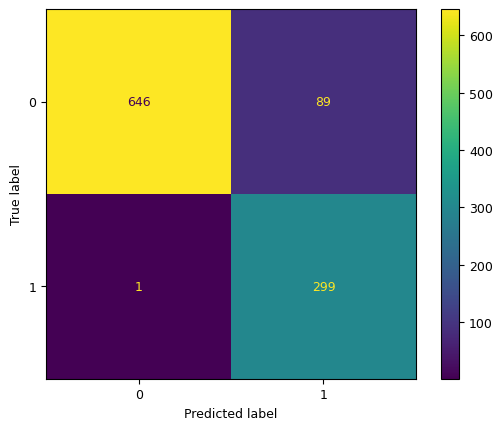

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_test_set, y_pred)
plt.show()

In [74]:
spam = df.loc[df.label == 'spam']
print(f"Porcentagem real de spam : {len(spam)/len(df)*100:.2f}%")
print(f"Porcentagem teste de spam : {300/(735+300)*100:.2f}%")

Porcentagem real de spam : 28.99%
Porcentagem teste de spam : 28.99%


In [29]:
clf.fit(x_train_set, y_train_set)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
clf.score(x_test_set,y_test_set)

0.9806763285024155